In [1]:
# --- Step 1: Upload the CSV File ---
from google.colab import files
uploaded = files.upload()

Saving business_demand_dataset_200.csv to business_demand_dataset_200.csv


In [2]:
# --- Step 2: Import Necessary Libraries ---
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# --- Step 3: Read the Dataset ---

df = pd.read_csv('business_demand_dataset_200.csv')


print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Provider,Location,Service_Type,Rating,No_of_Customers,Has_Discount,Avg_Price
0,A0,Urban,Cleaning,5.0,381,No,25
1,B1,Urban,Carpentry,3.2,224,No,22
2,C2,Rural,Cleaning,4.8,56,Yes,39
3,D3,Urban,Cleaning,3.4,484,Yes,47
4,E4,Urban,Plumbing,3.1,265,Yes,32


In [4]:
# --- Step 4: Preprocessing ---

df['Has_Discount'] = df['Has_Discount'].map({'Yes': 1, 'No': 0})
df['Location'] = df['Location'].map({'Urban': 1, 'Rural': 0})


print("\nAfter Encoding:")
display(df.head())


After Encoding:


,Provider,Location,Service_Type,Rating,No_of_Customers,Has_Discount,Avg_Price
0,A0,1,Cleaning,5.0,381,0,25
1,B1,1,Carpentry,3.2,224,0,22
2,C2,0,Cleaning,4.8,56,1,39
3,D3,1,Cleaning,3.4,484,1,47
4,E4,1,Plumbing,3.1,265,1,32


In [5]:
# --- Step 5: T-test: Impact of Discount on Customer Numbers ---
discount_customers = df[df['Has_Discount'] == 1]['No_of_Customers']
no_discount_customers = df[df['Has_Discount'] == 0]['No_of_Customers']
t_stat, p_value = ttest_ind(discount_customers, no_discount_customers)

print(f"\nT-test Results:")
print(f"T-statistic = {t_stat:.4f}")
print(f"P-value = {p_value:.4f}")

if p_value < 0.05:
    print("Result: There is a significant difference in customer numbers based on discount offering.")
else:
    print("Result: No significant difference found.")


T-test Results:
T-statistic = -0.1436
P-value = 0.8859
Result: No significant difference found.


In [6]:
# --- Step 6: Linear Regression Model to Predict No_of_Customers ---

X = df[['Rating', 'Avg_Price', 'Has_Discount', 'Location']]
y = df['No_of_Customers']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nLinear Regression Model Summary:")
print(model.summary())


Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:        No_of_Customers   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.340
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.257
Time:                        06:00:54   Log-Likelihood:                -1244.2
No. Observations:                 200   AIC:                             2498.
Df Residuals:                     195   BIC:                             2515.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

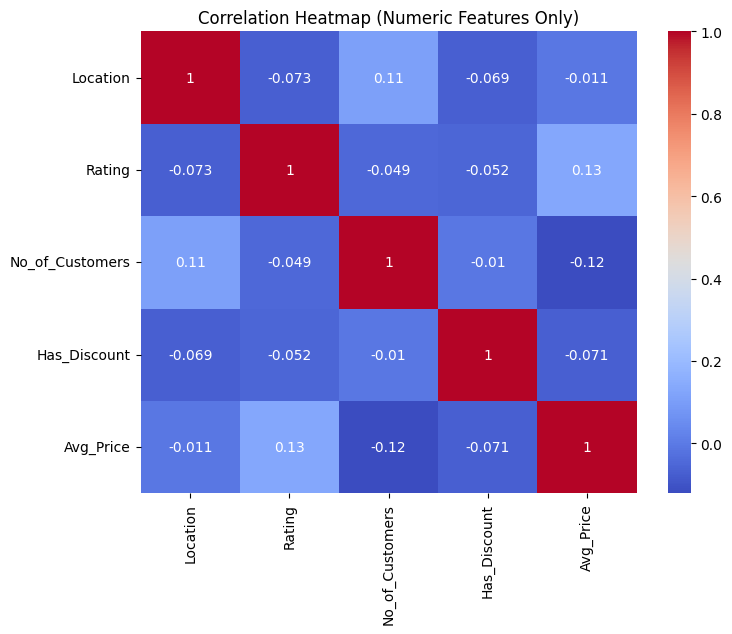

In [8]:
# --- Step 7: Visualizations ---
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()